## Basic Python Tools for Working with Raster Data

### Questions
What are some of open source Python tools used for working with Raster Data?

### Objectives
- Learn about rasterio for manipulating raster images

### Additional Information
- This tutorial was adapted from [Geohackweek 2019](https://github.com/geohackweek/tutorial_contents/blob/master/raster/notebooks/ghw2018-tutorial_NDVI-landsat-8-from-2017.ipynb)

In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'rasterio'

# Brief about rasterio
Rasterio is Python package which helps in reading gridded datasets; what are gridded datasets ? Satellite imagery is one example where the points on the grid refer to a point on earth, and has an associated value to it, generally reflectance in our ensuing examples. In our case when we refer about satellite imagery; they almost all the time refer to be the one produced by satellites. The file format that is mostly commonly used to encode such information is Geo(TIFF) - Geocoded TIFF. The package helps in reading and writing GeoTIFF files. Furthermore, rasterio gives numpy compatible access to the image data.

Decimation factor= 9


Text(0, 0.5, 'Row #')

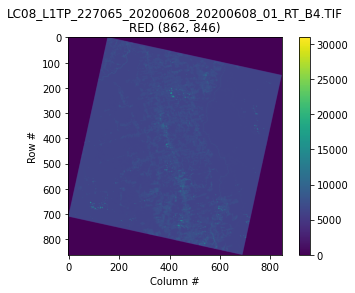

In [3]:
# Reading of one GeoTIFF file
date = '2020-06-08'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/227/065/LC08_L1TP_227065_20200608_20200608_01_RT/'
redband = 'LC08_L1TP_227065_20200608_20200608_01_RT_B{}.TIF'.format(4)

with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar()
plt.title('{}\nRED {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [2]:
# Python library developed/supported by Mapbox, rasterio, ... 